In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


In [2]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)
print(X.shape, Y.shape)


(500, 2) (500,)


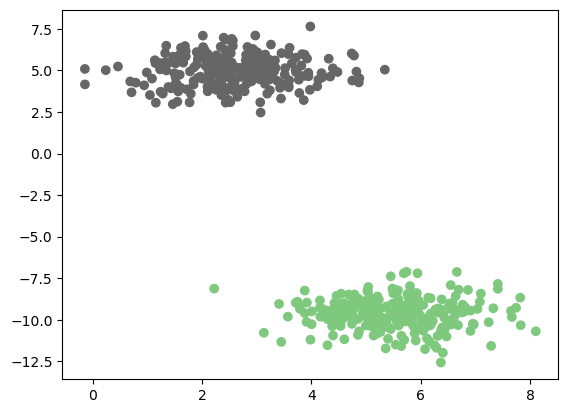

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y,  cmap=plt.cm.Accent)
plt.show()


### MODEL AND HELPER FUNCTION

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    #binary cross entropy loss/ log likelihood
    Y_ = predict(X, weights)
    cost = np.mean( -Y*np.log(Y_) + (1-Y)*np.log(1-Y_) )
    return cost

def update( X,Y, weights, learning_rate):
    #define update for one particular epoch
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)

    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights
    

def train(X, Y, learning_rate, maxEpoch=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    print(X.shape)

    #initialize weights
    weights = np.zeros(X.shape[1])

    #iterate and use update function
    for epoch in range(maxEpoch):
        weights = update(X, Y, weights, learning_rate)
        if epoch%10 == 0 :
            l = loss(X, Y, weights)
            print("\nEpoch Number:", str(epoch), "Loss: ", l,"\n")

    return weights
            

In [23]:
weights = train(X,Y,learning_rate=0.1)

(500, 3)

Epoch Number: 0 Loss:  0.0844740208776402 


Epoch Number: 10 Loss:  0.022988386198812865 


Epoch Number: 20 Loss:  0.013655732395395215 


Epoch Number: 30 Loss:  0.00980021804010454 


Epoch Number: 40 Loss:  0.0076781765841800855 


Epoch Number: 50 Loss:  0.006329652600901889 


Epoch Number: 60 Loss:  0.00539451358579212 


Epoch Number: 70 Loss:  0.004706719459269115 


Epoch Number: 80 Loss:  0.004178909856377864 


Epoch Number: 90 Loss:  0.0037606621262798786 



In [29]:
def get_preds(X_test, weights, labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.one(X_test.shape[0],1)
        X_test = np.hstack(ones, X_test)

    probs = predict(X_test, weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels


In [41]:
x1 = np.linspace(-2, 10, 10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[ 0.23750686  0.00462297 -0.22826092 -0.46114481 -0.6940287  -0.92691258
 -1.15979647 -1.39268036 -1.62556425 -1.85844814]


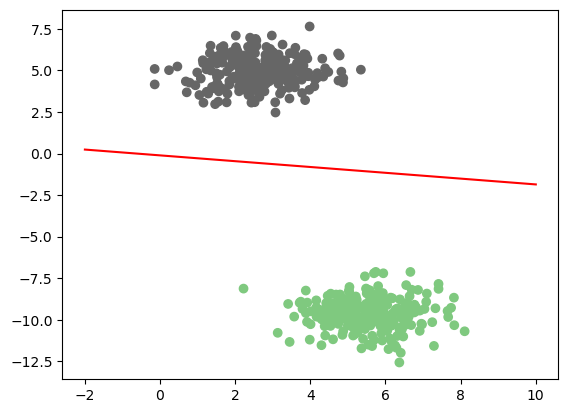

In [43]:
plt.scatter(X[:,0], X[:,1], c=Y,  cmap=plt.cm.Accent)
plt.plot(x1, x2, c="red")
plt.show()
